## Evaluation of networks trained on different datasets

In [21]:
import numpy as np
import uneye
from matplotlib.pyplot import *
%matplotlib inline

In [25]:
#cmap(np.linspace(0.2, 0.8, 100))
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))

cmap = get_cmap(cm.YlGnBu)
new_cmap = truncate_colormap(cmap, 0, 0.5)

In [23]:
data_folder = '../data/'
set_names = ['1','2','3','4']
weight_names = ['1','2','3','1+2+3']
freq = [1000,1000,500,1000]
n_test_samples = 300
np.random.seed(10)

F1 = np.zeros((len(set_names),len(weight_names)))

for iset,setname in enumerate(set_names):
    
    X = np.loadtxt(data_folder+'dataset'+setname+'/dataset'+setname+'_'+str(freq[iset])+'hz_X_setB.csv',delimiter=',')
    Y = np.loadtxt(data_folder+'dataset'+setname+'/dataset'+setname+'_'+str(freq[iset])+'hz_Y_setB.csv',delimiter=',')
    L = np.loadtxt(data_folder+'dataset'+setname+'/dataset'+setname+'_'+str(freq[iset])+'hz_Labels_setB.csv',delimiter=',')
    randind = np.random.permutation(X.shape[0])[:n_test_samples]
    print(L.shape)
    for iw,w in enumerate(weight_names):
        model = uneye.DNN(weights_name='weights_'+w,sampfreq=freq[iset],min_sacc_dur=6,min_sacc_dist=6)
        Pred,Prob,Perf = model.test(X[randind,:],Y[randind,:],L[randind,:])
        F1[iset,iw] = Perf['f1']
        

(1000, 1000)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.875
F1: 0.958
Binary Cohens Kappa:  0.682
F1: 0.813
Binary Cohens Kappa:  0.624
F1: 0.814
Binary Cohens Kappa:  0.854
F1: 0.944
(1000, 1000)
Binary Cohens Kappa:  0.556
F1: 0.743
Binary Cohens Kappa:  0.901
F1: 0.955
Binary Cohens Kappa:  0.146
F1: 0.509
Binary Cohens Kappa:  0.871
F1: 0.955
(53, 734)
Binary Cohens Kappa:  0.427
F1: 0.596
Binary Cohens Kappa:  0.529
F1: 0.738
Binary Cohens Kappa:  0.806
F1: 0.936
Binary Cohens Kappa:  0.822
F1: 0.931
(3300, 750)
Binary Cohens Kappa:  0.876
F1: 0.967
Binary Cohens Kappa:  0.706
F1: 0.876
Binary Cohens Kappa:  0.745
F1: 0.928
Binary Cohens Kappa:  0.846
F1: 0.948


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


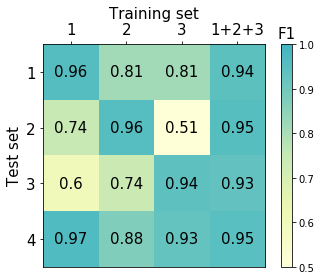

Intra-set performance: mean= 0.95 std= 0.01
Inter-set performance: mean= 0.79 std= 0.14


In [28]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, ax = subplots(figsize=(5,4))
im = ax.imshow(F1,cmap=new_cmap,vmin=0.5,vmax=1)
clb = colorbar(im)
clb.ax.set_title('F1',fontsize=15)
clb.ax.set_yticks(fontsize=15)

# We want to show all ticks...
ax.set_xticks(np.arange(len(weight_names)))
ax.set_yticks(np.arange(len(set_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(weight_names,fontsize=15)
ax.set_yticklabels(set_names,fontsize=15)
ax.xaxis.set_label_position('top') 
#ax.xaxis.tick_top()

ax.xaxis.set_ticks_position('top')

# axis labels
ax.set_xlabel('Training set',fontsize=15)
ax.set_ylabel('Test set',fontsize=15)


# Loop over data dimensions and create text annotations.
for i in range(len(set_names)):
    for j in range(len(weight_names)):
        text = ax.text(j, i, np.round(F1[i, j],2),
                       ha="center", va="center", color="k",size=15)
#ax.set_title("F1 scores for different networks",fontsize=15)
fig.tight_layout()
savefig('cross_performance.pdf')
show()

print('Intra-set performance: mean=',np.round(np.mean(F1[:-1,:-1].diagonal()),2),
      'std=',np.round(np.std(F1[:-1,:-1].diagonal()),2))
f1 = F1[:-1,:-1].copy()
f1 = f1[np.where(~np.eye(f1.shape[0],dtype=bool))]
f1 = np.concatenate([f1,F1[-1,:]])
print('Inter-set performance: mean=',np.round(np.mean(f1),2),'std=',np.round(np.std(f1),2))

# Train and test on 10 different human subjects

In [1]:
import numpy as np
import os
from matplotlib.pyplot import *
%matplotlib inline
import uneye

datafolder = '../data/dataset4'
X = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_X_setA.csv'),delimiter=',')
Y = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_Y_setA.csv'),delimiter=',')
L = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_Labels_setA.csv'),delimiter=',')
sub = np.loadtxt(os.path.join(datafolder,'Subject_nb_setA.csv'),delimiter=',')

subj = np.unique(sub)
for s in subj:
    subj_ind = np.where(sub==s)[0]
    np.random.shuffle(subj_ind)
    Xtrain = X[subj_ind,:]
    Ytrain = Y[subj_ind,:]
    Ltrain = L[subj_ind,:]
    
    model = uneye.DNN(weights_name='dataset4_sub%s' %int(s),sampfreq=1000,val_samples=30)
    model.train(Xtrain,Ytrain,Ltrain)

Early stopping at epoch 44 before overfitting occurred.
Model parameters saved to ./training/dataset4_sub10


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
# train a network on samples of all subjects
import numpy as np
import os
from matplotlib.pyplot import *
%matplotlib inline
import uneye

datafolder = '../data/dataset4'
X = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_X_setA.csv'),delimiter=',')
Y = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_Y_setA.csv'),delimiter=',')
L = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_Labels_setA.csv'),delimiter=',')
sub = np.loadtxt(os.path.join(datafolder,'Subject_nb_setA.csv'),delimiter=',')

subj = np.unique(sub)
chosen_ind = np.zeros(330)
for i,s in enumerate(subj):
    subj_ind = np.where(sub==s)[0]
    chosen_ind[i*33:(i+1)*33] = subj_ind[np.random.permutation(len(subj_ind))[:33]]

Xtrain = X[chosen_ind,:]
Ytrain = Y[chosen_ind,:]
Ltrain = L[chosen_ind,:]
print(len(chosen_ind))
model = uneye.DNN(weights_name='dataset4_all',sampfreq=1000,val_samples=30)
model.train(Xtrain,Ytrain,Ltrain)

Early stopping at epoch 59 before overfitting occurred.
Model parameters saved to ./training/dataset4_all


<Figure size 432x288 with 0 Axes>

In [3]:
# test performance
import numpy as np
import os
from matplotlib.pyplot import *
%matplotlib inline
import uneye

datafolder = '../data/dataset4'
X = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_X_setB.csv'),delimiter=',')
Y = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_Y_setB.csv'),delimiter=',')
L = np.loadtxt(os.path.join(datafolder,'dataset4_1000hz_Labels_setB.csv'),delimiter=',')
sub = np.loadtxt(os.path.join(datafolder,'Subject_nb_setB.csv'),delimiter=',')

subj = np.unique(sub)


F1 = np.zeros((len(subj)+1,len(subj)+1))
Kappa = np.zeros((len(subj)+1,len(subj)+1))

# test models trained on different subjects
for i1,s1 in enumerate(subj):
    model = uneye.DNN(weights_name='dataset4_sub%s' %int(s1),sampfreq=1000,min_sacc_dur=6,min_sacc_dist=6)
    # test on individual subjects
    for i2,s2 in enumerate(subj):
        subj_ind = np.where(sub==s2)[0]
        Xtest = X[subj_ind,:]
        Ytest = Y[subj_ind,:]
        Ltest = L[subj_ind,:]
        
        
        Pred,Prob,Perf = model.test(Xtest,Ytest,Ltest)
        F1[i2,i1] = Perf['f1']
        Kappa[i2,i1] = Perf['kappa']
        
    # average on all subjects
    #Pred,Prob,Perf = model.test(X,Y,L)
    F1[-1,i1] = np.mean(F1[:-1,i1])
    Kappa[-1,i1] = np.mean(Kappa[:-1,i1])
    

# test model trained on all subjects
model = uneye.DNN(weights_name='dataset4_all',sampfreq=1000,min_sacc_dur=6,min_sacc_dist=6)
for i2,s2 in enumerate(subj):
    subj_ind = np.where(sub==s2)[0]
    Xtest = X[subj_ind,:]
    Ytest = Y[subj_ind,:]
    Ltest = L[subj_ind,:]
    
    
    Pred,Prob,Perf = model.test(Xtest,Ytest,Ltest)
    F1[i2,-1] = Perf['f1']
    Kappa[i2,-1] = Perf['kappa']

#Pred,Prob,Perf = model.test(X,Y,L)
F1[-1,-1] = np.mean(F1[:-1,-1])
Kappa[-1,-1] = np.mean(Kappa[:-1,-1])

Binary Cohens Kappa:  0.9
F1: 0.944


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.833
F1: 0.941
Binary Cohens Kappa:  0.88
F1: 0.939
Binary Cohens Kappa:  0.9
F1: 0.97
Binary Cohens Kappa:  0.916
F1: 0.979
Binary Cohens Kappa:  0.84
F1: 0.924
Binary Cohens Kappa:  0.937
F1: 0.998
Binary Cohens Kappa:  0.85
F1: 0.952
Binary Cohens Kappa:  0.887
F1: 0.896
Binary Cohens Kappa:  0.829
F1: 0.928
Binary Cohens Kappa:  0.884
F1: 0.844
Binary Cohens Kappa:  0.899
F1: 0.961
Binary Cohens Kappa:  0.904
F1: 0.938
Binary Cohens Kappa:  0.928
F1: 0.976
Binary Cohens Kappa:  0.956
F1: 0.991
Binary Cohens Kappa:  0.88
F1: 0.935
Binary Cohens Kappa:  0.952
F1: 0.992
Binary Cohens Kappa:  0.899
F1: 0.965
Binary Cohens Kappa:  0.92
F1: 0.934
Binary Cohens Kappa:  0.898
F1: 0.964
Binary Cohens Kappa:  0.918
F1: 0.944
Binary Cohens Kappa:  0.901
F1: 0.97
Binary Cohens Kappa:  0.919
F1: 0.953
Binary Cohens Kappa:  0.929
F1: 0.973
Binary Cohens Kappa:  0.951
F1: 0.991
Binary Cohens Kappa:  0.877
F1: 0.939
Binary Cohens Kappa:  0.923
F1: 0.983
Binary Cohens Kappa: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colorbar.py:217: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


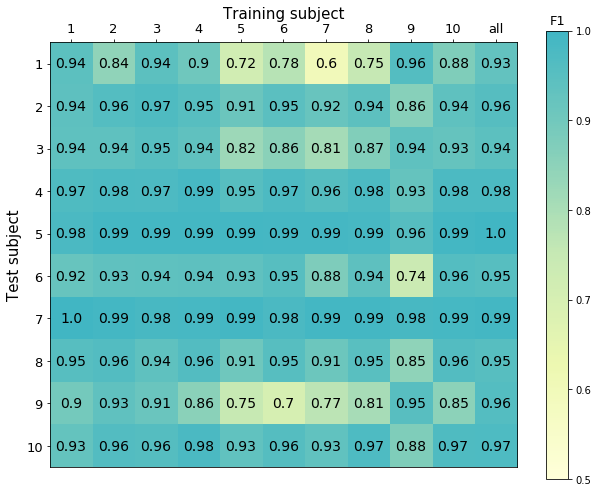

Intra-set performance: mean= 0.96 std= 0.02
Inter-set performance: mean= 0.92 std= 0.08
Performance when trained on all:
mean= 0.96 std= 0.02


In [20]:
import matplotlib.colors as colors
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))

cmap = get_cmap(cm.YlGnBu)
new_cmap = truncate_colormap(cmap, 0, 0.5)

figure(figsize=(9,7))
ax = subplot(111)
im = ax.imshow(F1[:-1,:],cmap=new_cmap,vmin=0.5,vmax=1)

# We want to show all ticks...
ax.set_xticks(np.arange(len(subj)+1))
ax.set_yticks(np.arange(len(subj)))
# ... and label them with the respective list entries
ax.set_xticklabels(list(subj.astype(int))+['all'],fontsize=13)
ax.set_yticklabels(list(subj.astype(int)),fontsize=13)
ax.xaxis.set_label_position('top') 
clb = colorbar(im)
clb.ax.set_title('F1',fontsize=13)
clb.ax.set_yticks(fontsize=13)

ax.xaxis.set_ticks_position('top')

# axis labels
ax.set_xlabel('Training subject',fontsize=15)
ax.set_ylabel('Test subject',fontsize=15)


# Loop over data dimensions and create text annotations.
for i in range(len(subj)):
    for j in range(len(subj)+1):
        text = ax.text(j, i, np.round(F1[i, j],2),
                       ha="center", va="center", color="k",size=14)
        
tight_layout()
savefig('cross_subjects.pdf')
show()

print('Intra-set performance: mean=',np.round(np.mean(F1[:-1,:-1].diagonal()),2),
      'std=',np.round(np.std(F1[:-1,:-1].diagonal()),2))
f1 = F1[:-1,:-1].copy()
f1 = f1[np.where(~np.eye(f1.shape[0],dtype=bool))]
print('Inter-set performance: mean=',np.round(np.mean(f1),2),'std=',np.round(np.std(f1),2))

print('Performance when trained on all:')
print('mean=',np.round(np.mean(F1[:-1,-1]),2),'std=',np.round(np.std(F1[:-1,-1]),2))